In [36]:
#Import the imported libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [37]:
#read the data 
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

In [38]:
print(train.head())
print(train.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [39]:
#Looking now at the number of non-NaN elements in each columns
notnullcount = train.count()
notnullcount

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
                 ... 
BedroomAbvGr     1460
KitchenAbvGr     1460
KitchenQual      1460
TotRmsAbvGrd     1460
Functional       1460
Fireplaces       1460
FireplaceQu       770
GarageType       1379
GarageYrBlt      1379
GarageFinish     1379
GarageCars       1460
GarageArea       1460
GarageQual       1379
GarageCond       1379
PavedDrive

In [40]:
#Deleting all the columns inferior to 30% the length of the dataset (number of columns)
disposable_columns = []
for n in range (0,train.shape[1]):
    if notnullcount[n] <0.3*train.shape[0]:
        disposable_columns = np.append(disposable_columns,[notnullcount.index[n]])
        train.drop([notnullcount.index[n]],1,inplace=True)

In [41]:
disposable_columns

array(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='<U32')

In [42]:
col = train.columns
col.shape

(77,)

In [43]:
# let's check for columns contraining null values
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
                 ...  
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinis

In [44]:
# let's now have a look at a ranking of the tops values in a column train['Neighborhood'].value_counts()

In [45]:
from collections import Counter

columns = train.columns
for col in columns:
    if train[col].dtype == np.dtype('O'):
        count = Counter(train[col])
        if (count.most_common(1)[0][0]) is np.nan:
            train[col].fillna(count.most_common(2)[1][0],inplace=True)
        else: 
            train[col].fillna(count.most_common(1)[0][0],inplace=True)
    else:
        train[col] = train[col].fillna(train[col].mean())
        

In [46]:
#we count the columns having missing values.
train.isnull().any().value_counts()

False    77
dtype: int64

In [47]:
#let's now drop the column Id as it is irrelevant for the analysis 
train.drop(['Id'],1,inplace=True)

In [48]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dataset_numeric = train.select_dtypes(include=numerics)

dataset_numeric.shape

nonnumeric = ['object']
dataset_nonnumeric = train.select_dtypes(include=nonnumeric)

In [49]:
dataset_numeric.skew()

MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

C:\Users\Marianne\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


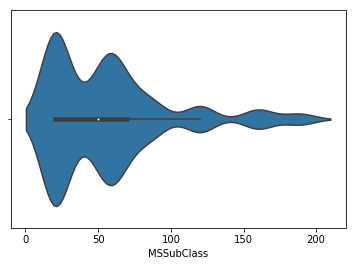

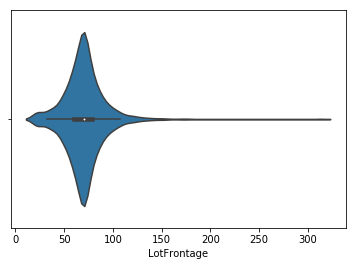

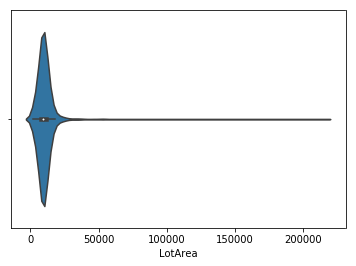

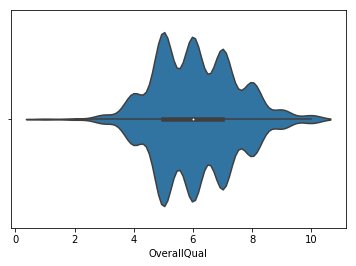

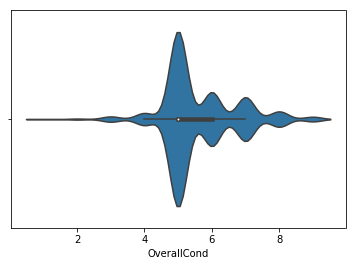

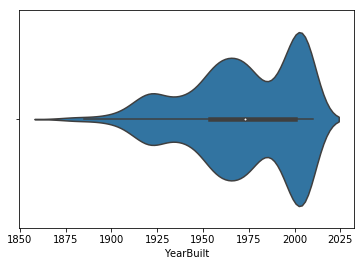

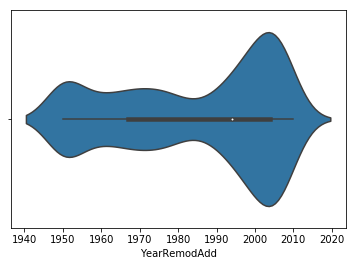

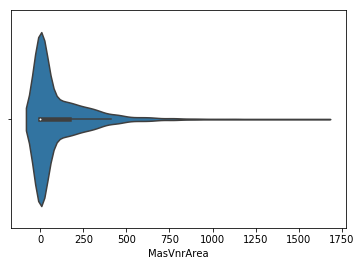

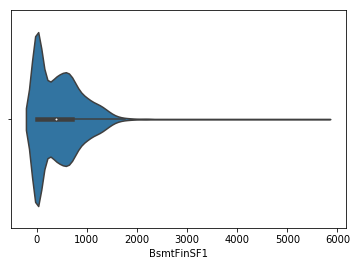

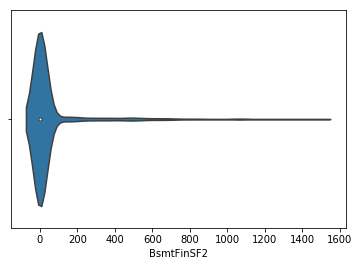

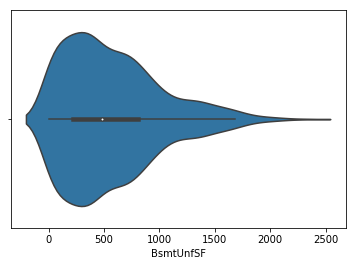

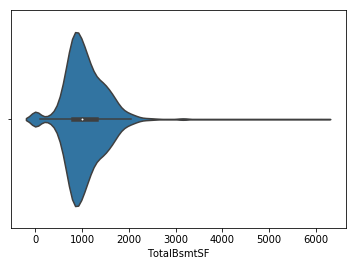

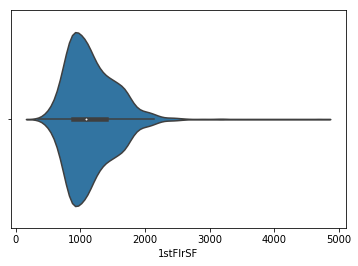

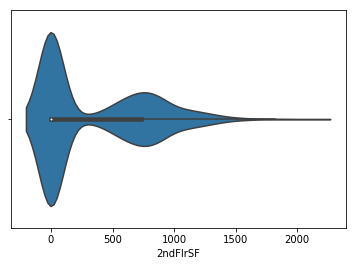

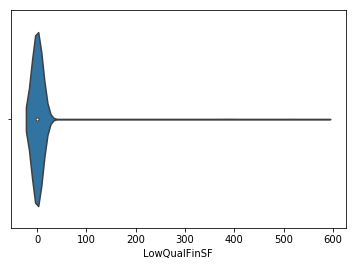

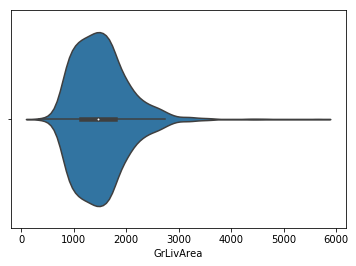

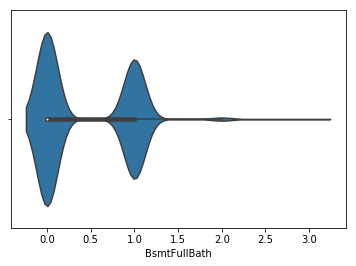

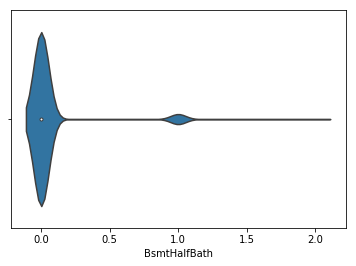

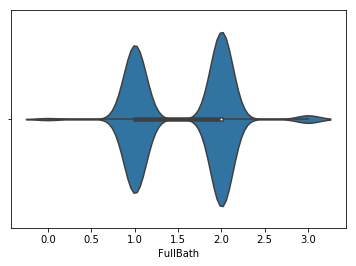

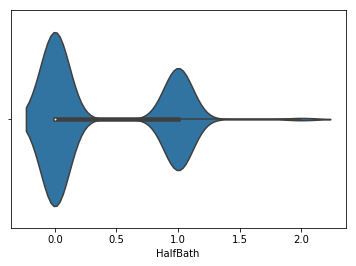

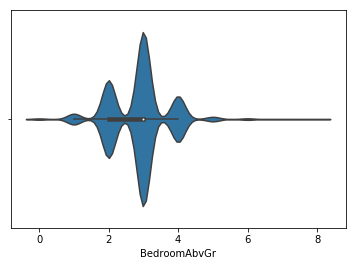

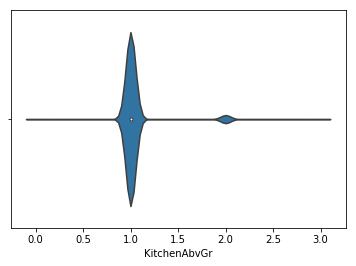

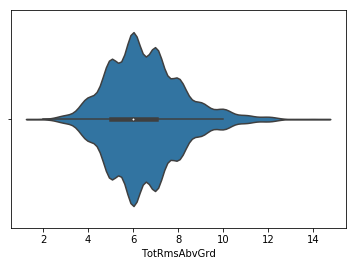

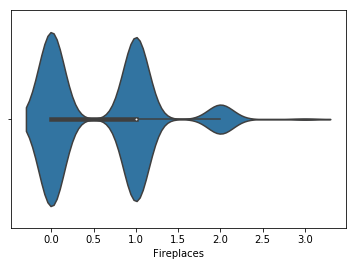

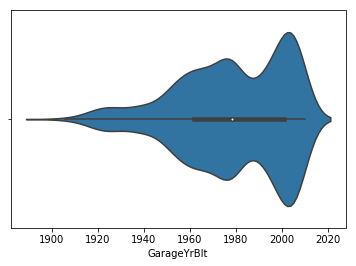

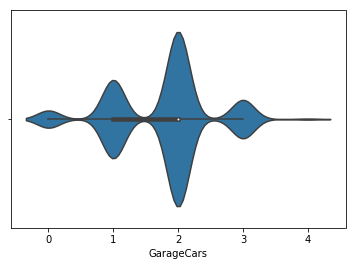

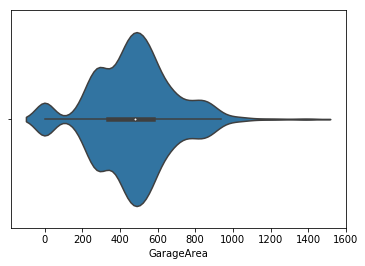

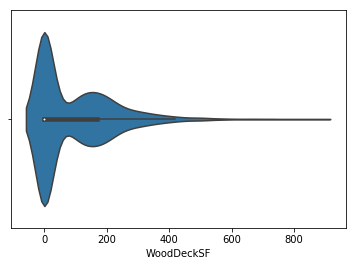

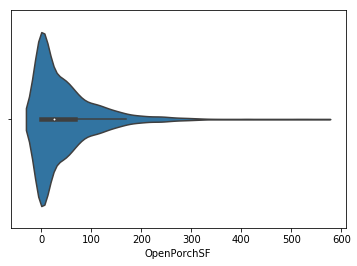

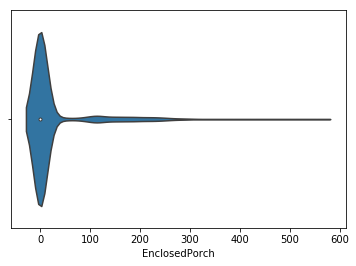

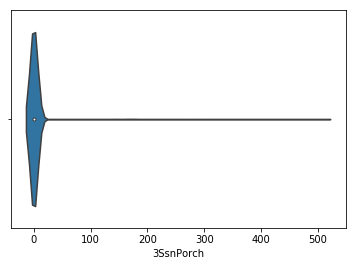

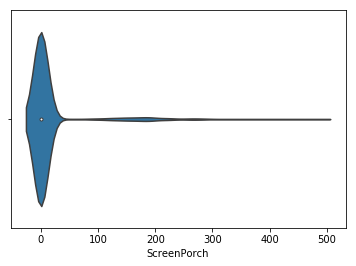

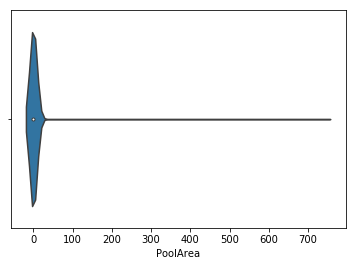

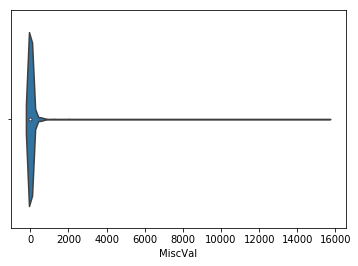

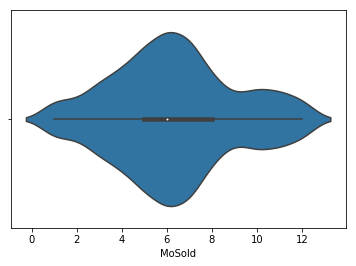

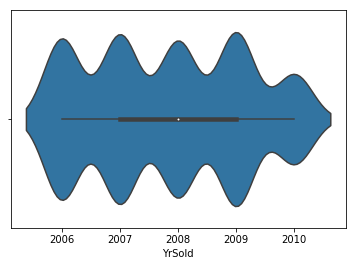

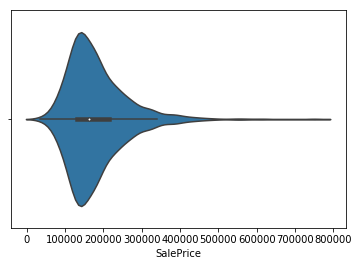

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
cols = dataset_numeric.columns
for c in cols:
    sns.violinplot(dataset_numeric[c])
    plt.xlabel(c)
    plt.show()

In [51]:
skew = dataset_numeric.skew()
skew #check the skew of the numeric values. 


MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

In [52]:
skewedfeatures = [s for s in skew if(s > 5.0)]
skewedfeatures
for skf in skewedfeatures:
    sk = skew[skew == skf].index[0]
    dataset_numeric[sk] = np.log1p(dataset_numeric[sk])



C:\Users\Marianne\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [53]:
skew2 = dataset_numeric.skew()
skew2 

MSSubClass        1.407657
LotFrontage       2.384950
LotArea          -0.137404
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      7.460317
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch         7.734975
ScreenPorch       4.122214
PoolArea         14.363102
MiscVal           5.170704
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

In [54]:
test.drop(disposable_columns,1,inplace=True)

In [55]:
#Read test data


columns = test.columns
for col in columns:
    if test[col].dtype == np.dtype('O'):
        count = Counter(test[col])
        if (count.most_common(1)[0][0]) is np.nan:
            test[col].fillna(count.most_common(2)[1][0],inplace=True)
        else: 
            test[col].fillna(count.most_common(1)[0][0],inplace=True)
    else:
        test[col] = test[col].fillna(test[col].mean())
        
        
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
test_numeric = test.select_dtypes(include=numerics)

for skf in skewedfeatures:
    sk = skew[skew == skf].index[0]
    test_numeric[sk] = np.log1p(test_numeric[sk])
test_numeric.shape




C:\Users\Marianne\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1459, 37)

In [56]:
nonnumeric = ['object']
test_nonnumeric = test.select_dtypes(include=nonnumeric)

In [57]:

# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore categorical data

# Calculates pearson co-efficient for all combinations
all_numeric = [test_numeric,dataset_numeric]
all_numeric = pd.concat(all_numeric)
all_numeric.shape
data_corr = all_numeric.loc[:, all_numeric.columns != 'SalePrice'].corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.7

# List of pairs along with correlation above threshold
corr_list = []

size = 36

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

1stFlrSF and 2ndFlrSF = 0.89
GrLivArea and ScreenPorch = 0.81
MSSubClass and PoolArea = 0.80
LowQualFinSF and MoSold = 0.79


In [58]:
for v,i,j in s_corr_list:
    test.drop([cols[j]],1,inplace=True)
    train.drop([cols[j]],1,inplace=True)

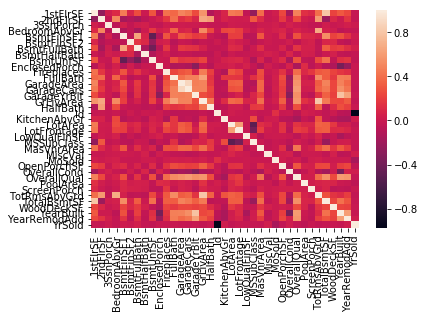

In [59]:

# plot the heatmap
sns.heatmap(data_corr, 
        xticklabels=data_corr.columns,
        yticklabels=data_corr.columns)

In [60]:
train.shape

(1460, 72)

In [61]:
#let's proceed to one hot encoding of our categorical variables. 
non_numeric_train = pd.get_dummies(dataset_nonnumeric)

non_numeric_test = pd.get_dummies(test_nonnumeric)


#now adding the missing dummy variables present in train_nonnumeric in test_nonnumeric
missing_cols = set( non_numeric_train.columns ) - set( test_nonnumeric.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    non_numeric_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
non_numeric_test = non_numeric_test[non_numeric_train.columns]

In [62]:
#let's now print the shape of the encoded categorical variables 
print(non_numeric_train.shape)
print(non_numeric_test.shape)

(1460, 239)
(1459, 239)


In [63]:
train_dataset_encoded = [non_numeric_train,dataset_numeric]

In [64]:
train_dataset_encoded = pd.concat(train_dataset_encoded,axis=1)
train_dataset_encoded.shape

(1460, 276)

In [65]:
test_dataset_encoded = [non_numeric_test,test_numeric]
test_dataset_encoded = pd.concat(test_dataset_encoded, axis = 1)
test_dataset_encoded.shape

(1459, 276)

In [66]:
test_dataset_encoded.drop(['Id'],1,inplace=True)
X_test = test_dataset_encoded

In [67]:
r, c = train_dataset_encoded.shape
train_dataset_encoded["SalePrice"] = np.log1p(train["SalePrice"])

X_train = train_dataset_encoded.loc[:, train_dataset_encoded.columns != 'SalePrice']
y_train = train_dataset_encoded.loc[:, train_dataset_encoded.columns == 'SalePrice']

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

C:\Users\Marianne\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Marianne\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Marianne\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Marianne\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.8)

lasso_params_housing = {"alpha": np.arange(0.0, 1.0, 0.01)}
gs_params_housing = {"cv": 3, "n_jobs": -1, "verbose": 1}

scores = []
for name, clf, params in [("Lasso", Lasso(), lasso_params_housing)]:
    grid = GridSearchCV(estimator=clf, param_grid=params, **gs_params_housing)
    grid.fit(X_train2, y_train2)
    scores.append((name, grid.score(X_test2, y_test2), grid.best_params_))
    


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.3s finished
C:\Users\Marianne\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [70]:
for name, score, params in scores:
    print("Score {0}: {1:0.2f}\t".format(name, score), params)

Score Lasso: 0.84	 {'alpha': 0.01}
